## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [3]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import os
%matplotlib inline
%pdb off

Automatic pdb calling has been turned OFF


### 1. Camera calibration

In [ ]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

In [ ]:
width, height = gray.shape[1], gray.shape[0]
retval, camMat, distCoef, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, (width, height), None, None)

### 2. Undistort Test Images

In [ ]:
# undistort test images and save them to `test_images_undist`
import os
%matplotlib inline
input_dir = "test_images"
output_dir = "test_images_undist"
test_images = os.listdir(input_dir)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for image_name in test_images:
    image = cv2.imread(os.path.join(input_dir, image_name))
    undist = cv2.undistort(image, camMat, distCoef)
    cv2.imwrite(os.path.join(output_dir, image_name), undist)
    plt.imshow(cv2.cvtColor(undist, cv2.COLOR_BGR2RGB))
    plt.show()
    
# if retval:
#     undist = cv2.undistort(gray, camMat, distCoef)
#     f, (axes0, axes1) = plt.subplots(1,2, figsize=(20,20))
#     axes0.imshow(gray, cmap="gray")
#     axes0.set_title("origin")
#     axes1.imshow(undist, cmap="gray")
#     axes1.set_title("undistorted")

### 3. Explore in different color spaces

In [ ]:
# Explore in RGB space
import os
%matplotlib inline
input_dir = "test_images_undist"
output_dir = "color_spaces/RGB"
test_images = os.listdir(input_dir)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for image_name in test_images:
    image = cv2.imread(os.path.join(input_dir, image_name))   #BGR
    image_b = image[:,:,0]
    g_min, g_max = 150,255
    image_g = image[:,:,1]
    image_g = cv2.inRange(image[:,:,1], g_min, g_max)
    r_min, r_max = 160, 255
    image_r = image[:,:,2]
    image_r = cv2.inRange(image[:,:,2], r_min, r_max)
    
#     cv2.imwrite(os.path.join(output_dir, image_name), undist)
    f, (axes0, axes1, axes2) = plt.subplots(1, 3, figsize = (20, 10))
    axes0.imshow(image_r, cmap='gray')
    axes0.set_title("R", fontsize = 20)
    axes1.imshow(image_g, cmap='gray')
    axes1.set_title("G", fontsize = 20)
    axes2.imshow(image_b, cmap='gray')
    axes2.set_title("B", fontsize = 20)
    plt.show()

In [ ]:
# Explore in HLS space
input_dir = "test_images_undist"
output_dir = "color_spaces/HLS"
test_images = os.listdir(input_dir)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for image_name in test_images:
    image = cv2.imread(os.path.join(input_dir, image_name))   #BGR
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
#     plt.imshow(image)
#     plt.show()
    h_min, h_max = 0,40
    image_h = image[:,:,0]
#     image_h = cv2.inRange(image[:,:,0], h_min, h_max)
    l_min, l_max = 140,255
#     image_l = image[:,:,1]
    image_l = cv2.inRange(image[:,:,1], l_min, l_max)
    s_min, s_max = 100, 255
#     image_s = image[:,:,2]
    image_s = cv2.inRange(image[:,:,2], s_min, s_max)
    
#     cv2.imwrite(os.path.join(output_dir, image_name), undist)
    f, (axes0, axes1, axes2) = plt.subplots(1, 3, figsize = (20, 10))
    axes0.imshow(image_h, cmap='gray')
    axes0.set_title("H", fontsize = 20)
    axes1.imshow(image_l, cmap='gray')
    axes1.set_title("L", fontsize = 20)
    axes2.imshow(image_s, cmap='gray')
    axes2.set_title("S", fontsize = 20)
    plt.show()

In [ ]:
# Explore in HSV space
input_dir = "test_images_undist"
output_dir = "color_spaces/HSV"
test_images = os.listdir(input_dir)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for image_name in test_images:
    image = cv2.imread(os.path.join(input_dir, image_name))   #BGR
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
#     plt.imshow(image)
#     plt.show()
    h_min, h_max = 0,40
    image_h = image[:,:,0]
#     image_h = cv2.inRange(image[:,:,0], h_min, h_max)
    s_min, s_max = 200,255
    image_s = image[:,:,1]
#     image_g = cv2.inRange(image[:,:,1], g_min, g_max)
    v_min, v_max = 160, 255
    image_v = image[:,:,2]
#     image_v = cv2.inRange(image[:,:,2], v_min, v_max)
    
#     cv2.imwrite(os.path.join(output_dir, image_name), undist)
    f, (axes0, axes1, axes2) = plt.subplots(1, 3, figsize = (20, 10))
    axes0.imshow(image_h, cmap='gray')
    axes0.set_title("H", fontsize = 20)
    axes1.imshow(image_s, cmap='gray')
    axes1.set_title("S", fontsize = 20)
    axes2.imshow(image_v, cmap='gray')
    axes2.set_title("V", fontsize = 20)
    plt.show()

In [ ]:
# Explore in LAB space
input_dir = "test_images_undist"
output_dir = "color_spaces/LAB"
test_images = os.listdir(input_dir)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for image_name in test_images:
    image = cv2.imread(os.path.join(input_dir, image_name))   #BGR
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
#     plt.imshow(image)
#     plt.show()
    l_min, l_max = 180,255
    image_l = image[:,:,0]
#     image_l = cv2.inRange(image[:,:,0], l_min, l_max)
    a_min, a_max = 200,255
    image_a = image[:,:,1]
#     print(np.min(image_a), np.max(image_a))
#     image_g = cv2.inRange(image[:,:,1], g_min, g_max)
    b_min, b_max = 140, 255
#     image_b = image[:,:,2]
#     print(np.min(image_b), np.max(image_b))
    image_b = cv2.inRange(image[:,:,2], b_min, b_max)
    
#     cv2.imwrite(os.path.join(output_dir, image_name), undist)
    f, (axes0, axes1, axes2) = plt.subplots(1, 3, figsize = (20, 10))
    axes0.imshow(image_l, cmap='gray')
    axes0.set_title("L", fontsize = 20)
    axes1.imshow(image_a, cmap='gray')
    axes1.set_title("A", fontsize = 20)
    axes2.imshow(image_b, cmap='gray')
    axes2.set_title("B", fontsize = 20)
    plt.show()

In [ ]:
# combine different color filtered results


### 4. Filter out lane lines with gradient

In [5]:
# Based on the exploration in above different color spaces, we find that R/G channels in RGB space, L/S channels in HLS space, 
# S/V channels in HSV space and L/B channels in LAB space are good indicators to select lane lines.
def abs_sobel_thresh(img, orient ='x', sobel_kernel = 3, thresh = (0,255)):
    # Calculate directional gradients
    min_thresh, max_thresh = thresh[0], thresh[1]
    if len(img.shape) ==3:
        image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = img
    if orient =='x':
        sobel = np.absolute(cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    else:
        sobel = np.absolute(cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    sobel = np.uint8(255*sobel/np.max(sobel))
    grad_binary = np.zeros_like(sobel)
    grad_binary[(sobel>=min_thresh) & (sobel<=max_thresh)] = 1
    return grad_binary

def mag_thresh(img, sobel_kernel=3, thresh = (0, 255)):
    #Calculate gradient magnitude
    min_thresh, max_thresh = thresh[0], thresh[1]
    if len(img.shape) == 3:
        image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = img
    sobel_x = np.absolute(cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    sobel_y = np.absolute(cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    sobel_xy = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_res = np.uint8(255*sobel_xy/np.max(sobel_xy))
    mag_binary = np.zeros_like(sobel_res)
    mag_binary[(sobel_res>=min_thresh) & (sobel_res<=max_thresh)] = 1
    return mag_binary

def dir_thresh(img, sobel_kernel=3, thresh = (0, np.pi/2)):
    #Calculate gradient direction
    min_thresh, max_thresh = thresh[0], thresh[1]
    if len(img.shape) == 3:
        image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = img
    sobel_x = np.absolute(cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    sobel_y = np.absolute(cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    sobel_dir = np.arctan2(sobel_y, sobel_x)
    sobel_res = np.float32(np.pi/2*sobel_dir/np.max(sobel_dir))
    dir_binary = np.zeros_like(sobel_res)
    dir_binary[(sobel_res>=min_thresh) & (sobel_res<=max_thresh)] = 1
    return dir_binary

def select_yellow_white(image):
    converted = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    white_low_threshold = np.uint8([0, 200, 0])
    white_high_threshold = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(converted, white_low_threshold, white_high_threshold)
    
    yellow_low_threshold = np.uint8([10, 0, 100])
    yellow_high_threshold = np.uint8([40, 255, 255])
    yellow_mask = cv2.inRange(converted, yellow_low_threshold, yellow_high_threshold)
    
    white_yellow_mask = cv2.bitwise_or(white_mask, yellow_mask)
    result = cv2.bitwise_and(image, image, mask = white_yellow_mask)
    
    return result

In [ ]:
?cv2.bitwise_and

In [ ]:
ksize = 5

# In RGB space
input_dir = "test_images_undist"
test_images = os.listdir(input_dir)
for image_name in test_images:
    image = cv2.imread(os.path.join(input_dir, image_name))   #BGR
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
#     r_min, r_max = 180,255
    img_rgb_r = image_rgb[:,:,0]
    mag_rgb_r = mag_thresh(img_rgb_r, ksize, (30,255))
    dir_rgb_r = dir_thresh(img_rgb_r, ksize, (0.7,1.3))
    img_rgb_rbin = np.zeros_like(img_rgb_r)
    img_rgb_rbin[(mag_rgb_r==1)&(dir_rgb_r==1)] = 1 
                                              
#     g_min, g_max = 200,255
    img_rgb_g = image_rgb[:,:,1]
    mag_rgb_g = mag_thresh(img_rgb_g, ksize, (30, 255))
    dir_rgb_g = dir_thresh(img_rgb_g, ksize, (0.7, 1.3))
    img_rgb_gbin = np.zeros_like(img_rgb_g)
    img_rgb_gbin[(mag_rgb_g==1)&(dir_rgb_g==1)] = 1
    
    f, (axes0, axes1, axes2) = plt.subplots(1, 3, figsize = (20, 10))
    axes0.imshow(image_rgb)
    axes0.set_title("Original", fontsize = 20)
    axes1.imshow(img_rgb_rbin, cmap='gray')
    axes1.set_title("R+grad", fontsize = 20)
    axes2.imshow(img_rgb_gbin, cmap='gray')
    axes2.set_title("G+grad", fontsize = 20)
    plt.show()

In [ ]:
ksize = 5

# In RGB space
input_dir = "test_images_undist"
test_images = os.listdir(input_dir)
for image_name in test_images:
    image = cv2.imread(os.path.join(input_dir, image_name))   #BGR
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    
#     r_min, r_max = 180,255
    img_hls_l = image_hls[:,:,1]
    mag_hls_l = mag_thresh(img_hls_l, ksize, (20,255))
    dir_hls_l = dir_thresh(img_hls_l, ksize, (0.7,1.3))
    img_hls_lbin = np.zeros_like(img_hls_l)
    img_hls_lbin[(mag_hls_l==1)&(dir_hls_l==1)] = 1 
                                              
#     g_min, g_max = 200,255
    img_hls_s = image_hls[:,:,2]
    mag_hls_s = mag_thresh(img_hls_s, ksize, (20, 255))
    dir_hls_s = dir_thresh(img_hls_s, ksize, (0.7, 1.3))
    img_hls_sbin = np.zeros_like(img_hls_s)
    img_hls_sbin[(mag_hls_s==1)&(dir_hls_s==1)] = 1
    
    f, (axes0, axes1, axes2) = plt.subplots(1, 3, figsize = (20, 10))
    axes0.imshow(image_rgb)
    axes0.set_title("Original", fontsize = 20)
    axes1.imshow(img_hls_lbin, cmap='gray')
    axes1.set_title("HLS(L)+grad", fontsize = 20)
    axes2.imshow(img_hls_sbin, cmap='gray')
    axes2.set_title("HLS(S)+grad", fontsize = 20)
    plt.show()

In [ ]:
ksize = 5

# In HSV space
input_dir = "test_images_undist"
test_images = os.listdir(input_dir)
for image_name in test_images:
    image = cv2.imread(os.path.join(input_dir, image_name))   #BGR
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
#     r_min, r_max = 180,255
    img_hsv_s = image_hsv[:,:,1]
    mag_hsv_s = mag_thresh(img_hsv_s, ksize, (20,255))
    dir_hsv_s = dir_thresh(img_hsv_s, ksize, (0.7,1.3))
    img_hsv_sbin = np.zeros_like(img_hsv_s)
    img_hsv_sbin[(mag_hsv_s==1)&(dir_hsv_s==1)] = 1 
                                              
#     g_min, g_max = 200,255
    img_hsv_v = image_hsv[:,:,2]
    mag_hsv_v = mag_thresh(img_hsv_v, ksize, (30, 255))
    dir_hsv_v = dir_thresh(img_hsv_v, ksize, (0.7, 1.3))
    img_hsv_vbin = np.zeros_like(img_hsv_v)
    img_hsv_vbin[(mag_hsv_v==1)&(dir_hsv_v==1)] = 1
    
    f, (axes0, axes1, axes2) = plt.subplots(1, 3, figsize = (20, 10))
    axes0.imshow(image_rgb)
    axes0.set_title("Original", fontsize = 20)
    axes1.imshow(img_hsv_sbin, cmap='gray')
    axes1.set_title("HSV(S)", fontsize = 20)
    axes2.imshow(img_hsv_vbin, cmap='gray')
    axes2.set_title("HSV(V)", fontsize = 20)
    plt.show()

In [ ]:
ksize = 5

# In LAB space
input_dir = "test_images_undist"
test_images = os.listdir(input_dir)
for image_name in test_images:
    image = cv2.imread(os.path.join(input_dir, image_name))   #BGR
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
#     r_min, r_max = 180,255
    img_lab_l = image_lab[:,:,0]
    mag_lab_l = mag_thresh(img_lab_l, ksize, (20,255))
    dir_lab_l = dir_thresh(img_lab_l, ksize, (0.7,1.3))
    img_lab_lbin = np.zeros_like(img_lab_l)
    img_lab_lbin[(mag_lab_l==1)&(dir_lab_l==1)] = 1 
                                              
#     g_min, g_max = 200,255
    img_lab_b = image_lab[:,:,2]
    mag_lab_b = mag_thresh(img_lab_b, ksize, (30, 255))
    dir_lab_b = dir_thresh(img_lab_b, ksize, (0.7, 1.3))
    img_lab_bbin = np.zeros_like(img_lab_b)
    img_lab_bbin[(mag_lab_b==1)&(dir_lab_b==1)] = 1
    
    f, (axes0, axes1, axes2) = plt.subplots(1, 3, figsize = (20, 10))
    axes0.imshow(image_rgb)
    axes0.set_title("Original", fontsize = 20)
    axes1.imshow(img_lab_lbin, cmap='gray')
    axes1.set_title("LAB(L)", fontsize = 20)
    axes2.imshow(img_lab_bbin, cmap='gray')
    axes2.set_title("LAB(B)", fontsize = 20)
    plt.show()

In [ ]:
?cv2.Canny()

(720, 1280)


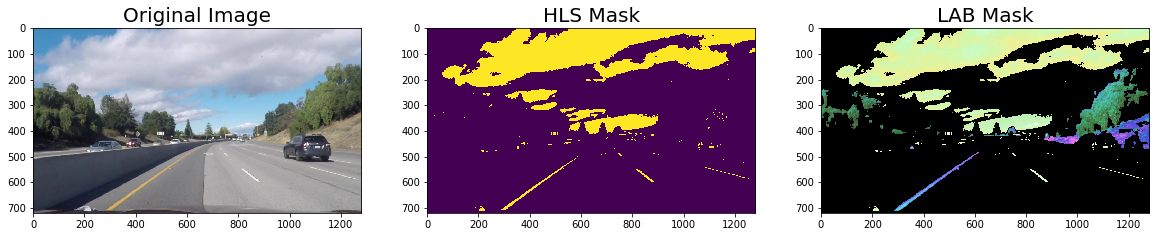

(720, 1280)


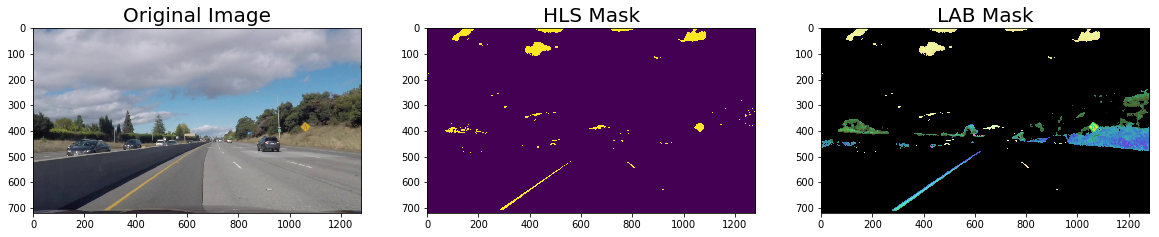

(720, 1280)


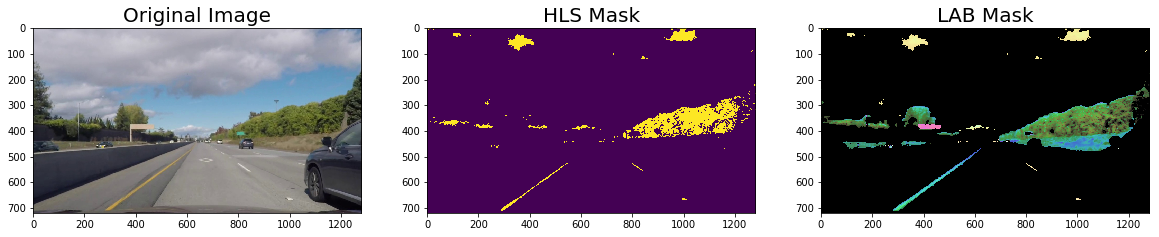

(720, 1280)


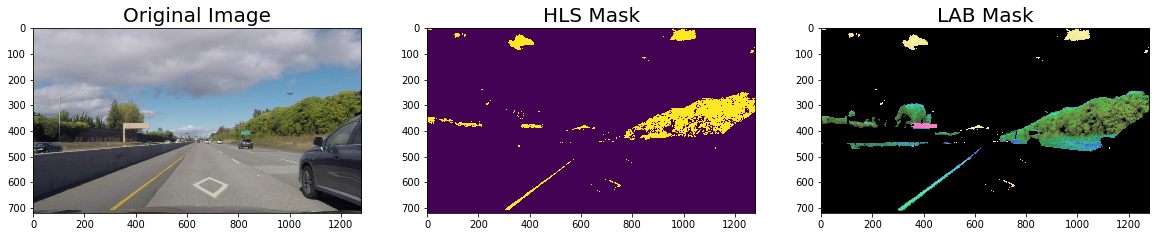

(720, 1280)


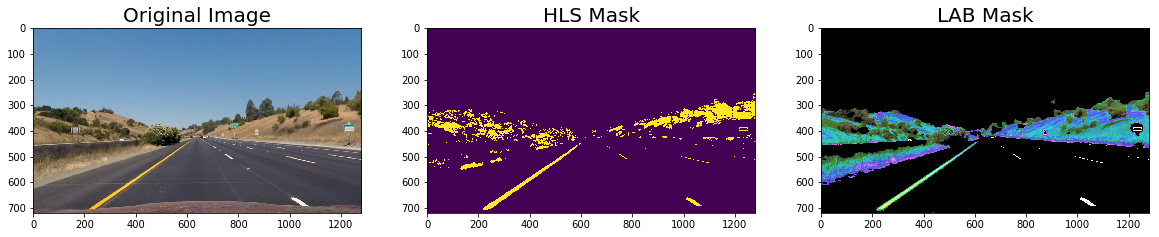

(720, 1280)


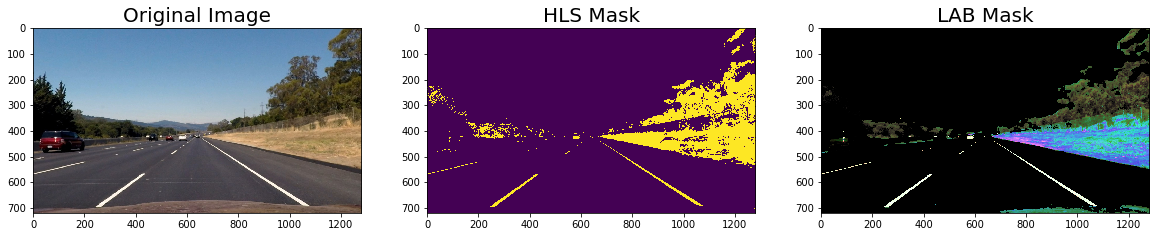

(720, 1280)


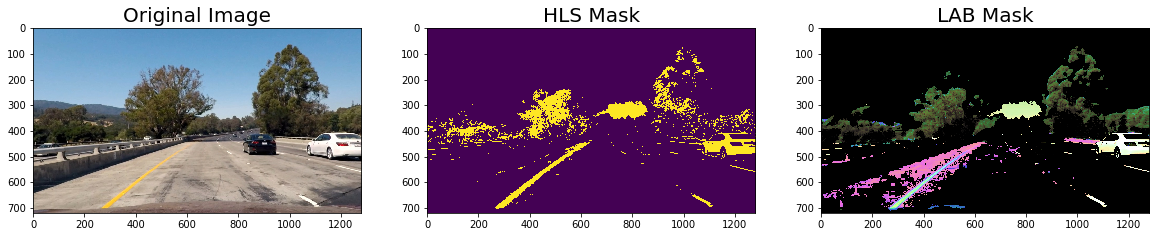

(720, 1280)


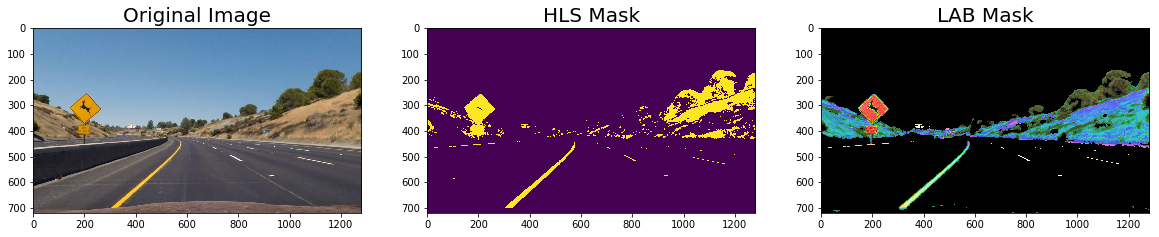

(720, 1280)


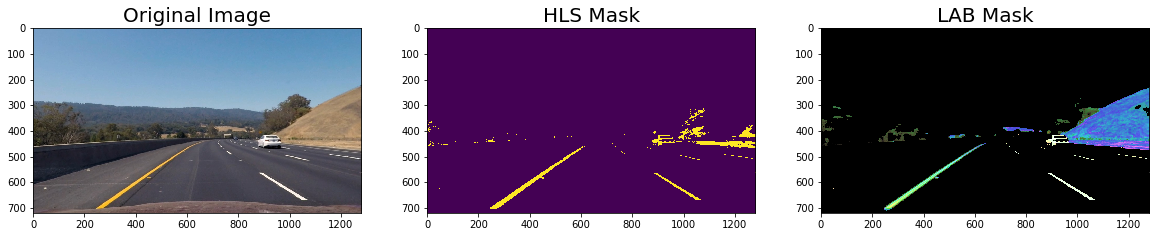

(720, 1280)


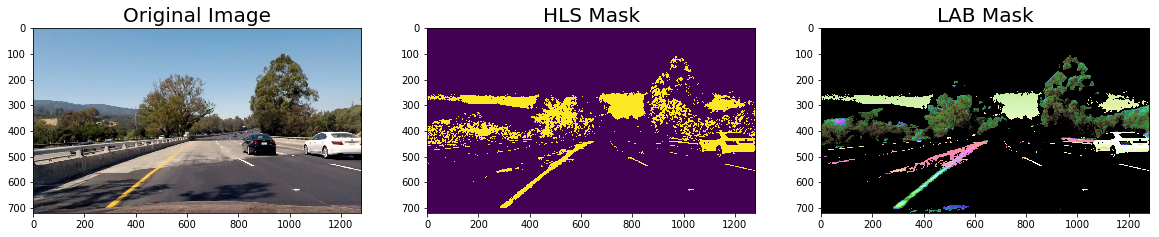

(720, 1280)


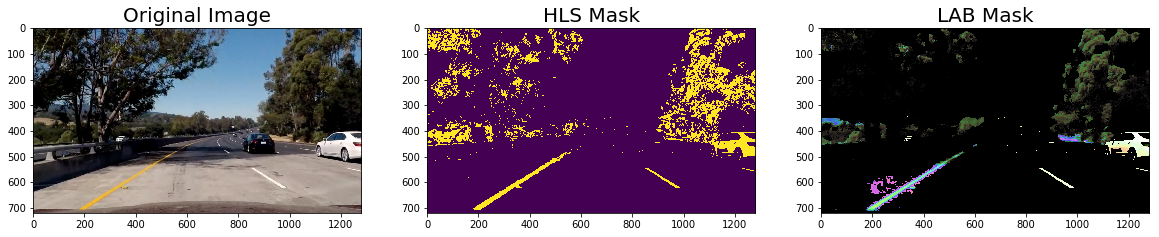

(720, 1280)


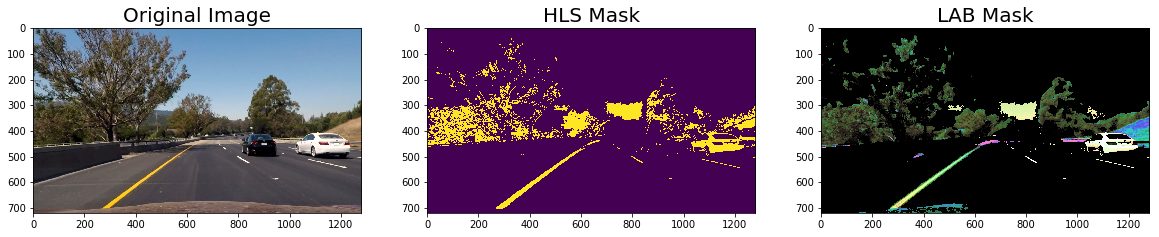

In [3]:
# Explore in different color space
input_dir = "test_images_undist"
output_dir = "color_spaces/HLS"
test_images = os.listdir(input_dir)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for image_name in test_images:
    image = cv2.imread(os.path.join(input_dir, image_name))   #BGR
    converted_hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    converted_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    converted_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    
    hls_low_thresh1 = np.uint8([0,200,0])
    hls_high_thresh1 = np.uint8([255,255,255])
    hls_mask1 = cv2.inRange(converted_hls, hls_low_thresh1, hls_high_thresh1)
    
    hls_low_thresh2 = np.uint8([10,0,80])
    hls_high_thresh2 = np.uint8([50,255,255])
    hls_mask2 = cv2.inRange(converted_hls, hls_low_thresh2, hls_high_thresh2)
    hls_mask = cv2.bitwise_or(hls_mask1, hls_mask2)
    print(hls_mask.shape)
    
    lab_low_thresh = np.uint8([0,0,140])
    lab_high_thresh = np.uint8([255,255,255])
    lab_mask = cv2.inRange(converted_lab, lab_low_thresh, lab_high_thresh)
    
    combined_mask = cv2.bitwise_or(hls_mask, lab_mask)
    result = cv2.bitwise_and(image, image, mask = combined_mask)
    
    
    
#     cv2.imwrite(os.path.join(output_dir, image_name), undist)
    f, (axes0, axes1, axes2) = plt.subplots(1, 3, figsize = (20, 10))
    axes0.imshow(converted_rgb)
    axes0.set_title("Original Image", fontsize = 20)
    axes1.imshow(hls_mask)
    axes1.set_title("HLS Mask", fontsize = 20)
    axes2.imshow(cv2.cvtColor(result, cv2.COLOR_HLS2RGB))
    axes2.set_title("LAB Mask", fontsize = 20)
    plt.show()

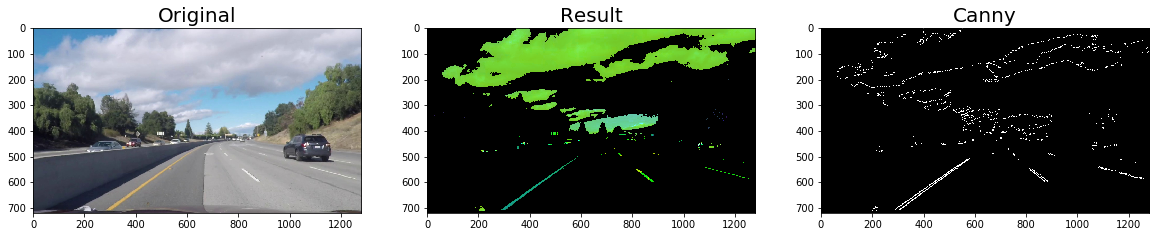

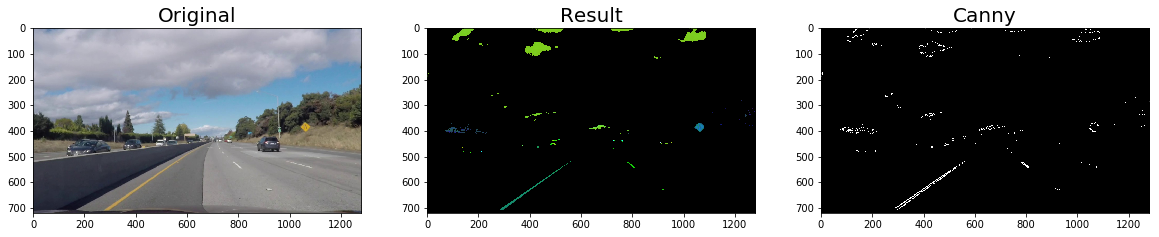

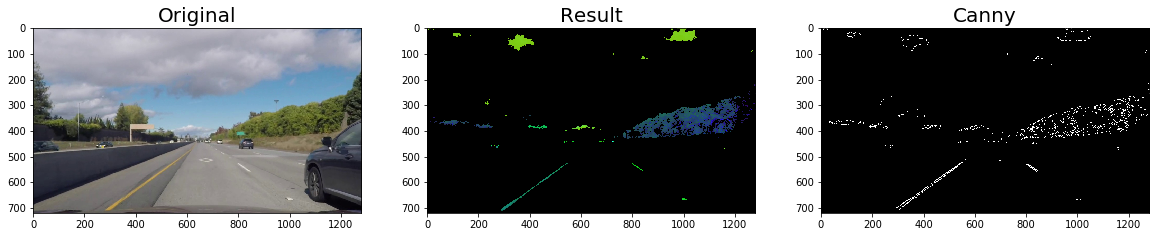

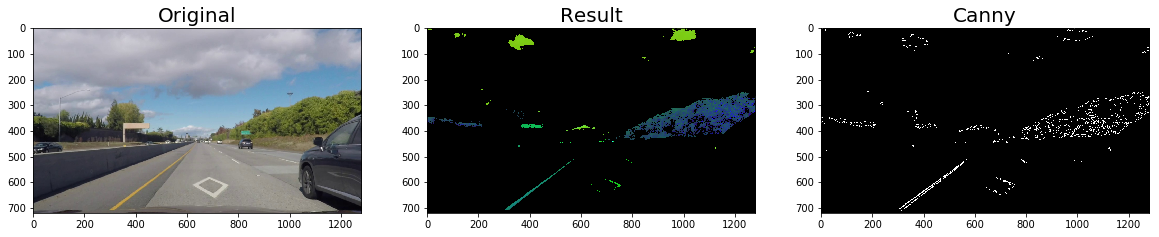

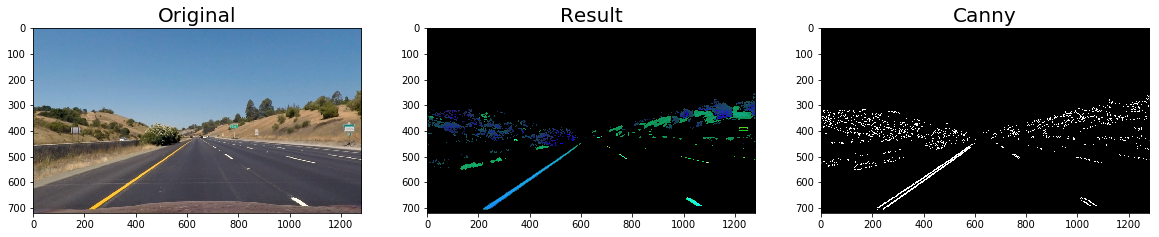

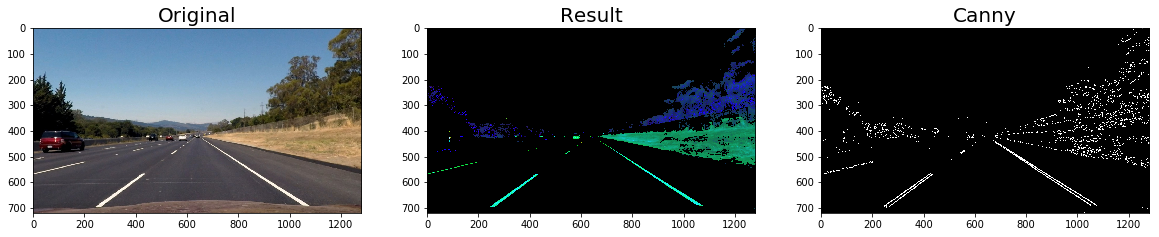

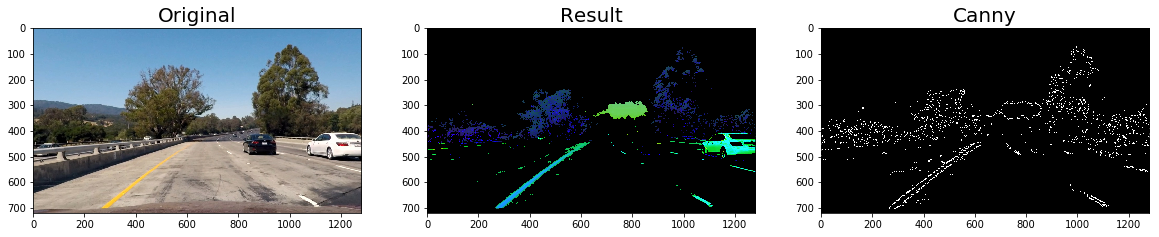

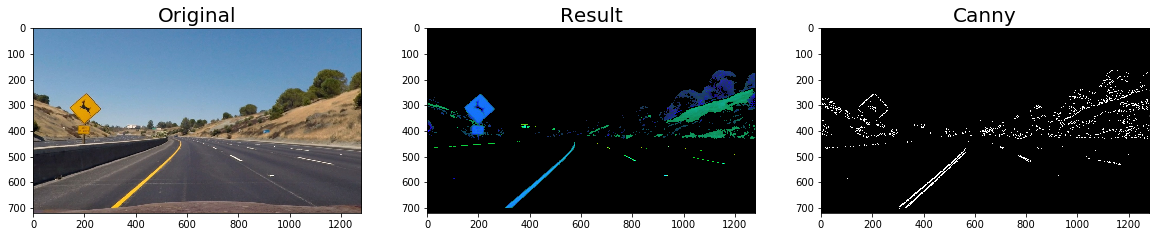

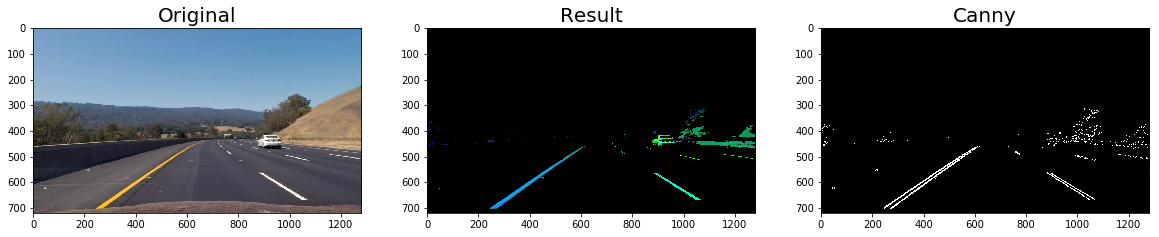

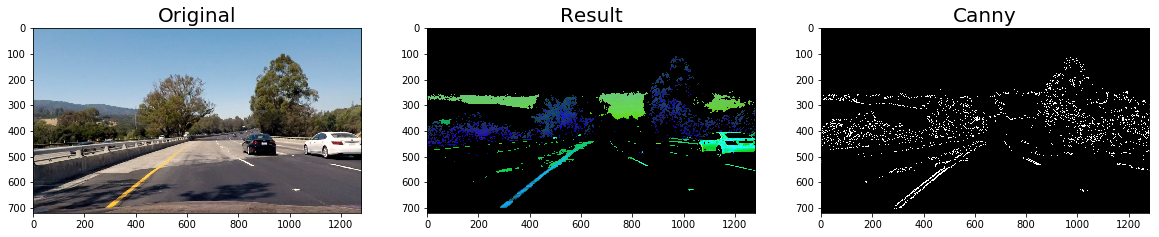

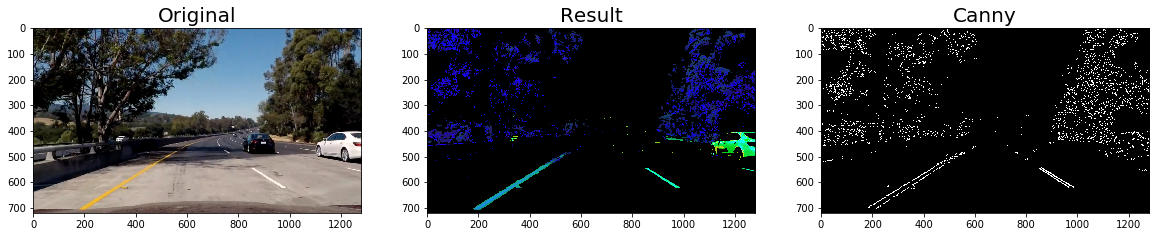

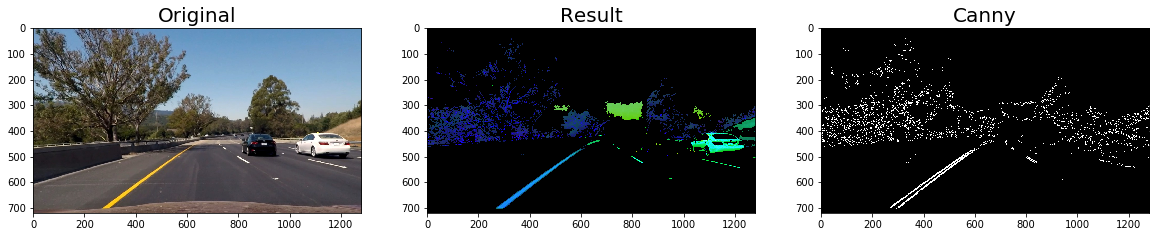

In [6]:
# combine all the gradient results
import os
ksize = 5
input_dir = "test_images_undist"
output_dir = "test_images_binary"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
test_images = os.listdir(input_dir)
# image = cv2.imread(os.path.join(input_dir, "straight_lines1.jpg"))
# img_total_bin = np.zeros_like(image[:,:,0])
def explore_space(img):
    mag_ = mag_thresh(img, ksize, (30, 255))
    dir_ = dir_thresh(img, ksize, (0.7, 1.3))
    img_bin = np.zeros_like(img)
    img_bin[(mag_==1)&(dir_==1)] = 255
    return img_bin

def select_yellow_white(image):
    converted = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    white_low_threshold = np.uint8([0, 200, 0])
    white_high_threshold = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(converted, white_low_threshold, white_high_threshold)
    
    yellow_low_threshold = np.uint8([10, 0, 100])
    yellow_high_threshold = np.uint8([40, 255, 255])
    yellow_mask = cv2.inRange(converted, yellow_low_threshold, yellow_high_threshold)
    
    white_yellow_mask = cv2.bitwise_or(white_mask, yellow_mask)
    result = cv2.bitwise_and(image, image, mask = white_yellow_mask)
    
    return result

def select_lane(image):
#     converted_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     rgb_low_thresh = np.uint8([160,150,0])
#     rgb_high_thresh = np.uint8([255,255,255])
#     rgb_mask = cv2.inRange(converted_rgb, rgb_low_thresh, rgb_high_thresh)
    
#     converted_hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    hls_low_thresh1 = np.uint8([0,200,0])
    hls_high_thresh1 = np.uint8([255,255,255])
    hls_mask1 = cv2.inRange(image, hls_low_thresh1, hls_high_thresh1)
    
    hls_low_thresh2 = np.uint8([10,0,80])
    hls_high_thresh2 = np.uint8([50,255,255])
    hls_mask2 = cv2.inRange(image, hls_low_thresh2, hls_high_thresh2)
    
    mask = cv2.bitwise_or(hls_mask1, hls_mask2)
#     mask = cv2.bitwise_or(mask, lab_mask)
    result = cv2.bitwise_and(image, image, mask = mask)
    return result

for image_name in test_images:
    image = cv2.imread(os.path.join(input_dir, image_name))   #BGR
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    
    img_mask = select_lane(image_hls)
    img_mask_gray = cv2.cvtColor(img_mask, cv2.COLOR_BGR2GRAY)
    img_comb = explore_space(img_mask_gray)
    
    cv2.imwrite(os.path.join(output_dir, image_name), img_comb)
    
    f, (axes0, axes1, axes2) = plt.subplots(1, 3, figsize = (20, 10))
    axes0.imshow(image_rgb)
    axes0.set_title("Original", fontsize = 20)
    axes1.imshow(img_mask)
    axes1.set_title("Result", fontsize = 20)
    axes2.imshow(img_comb, cmap='gray')
    axes2.set_title("Canny", fontsize = 20)
    plt.show()
    

### 5. Apply Perspective Transform

width: 1280, height: 720


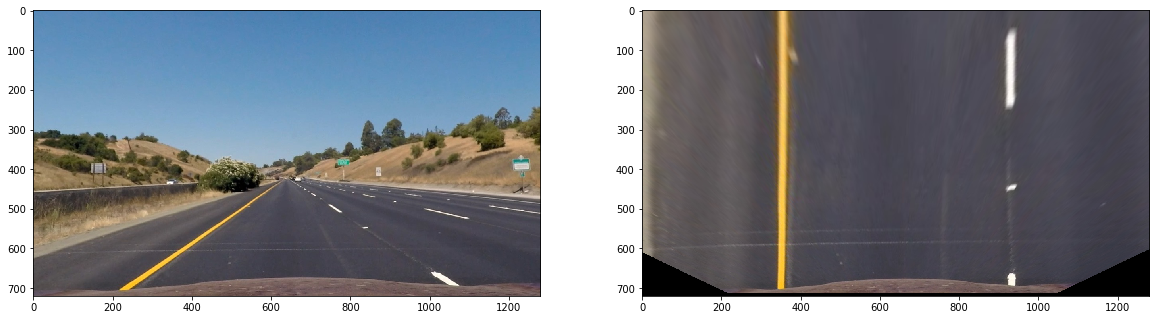

In [7]:
img_straight = cv2.imread(os.path.join(input_dir, "straight_lines1.jpg"))
width, height = img_straight.shape[1], img_straight.shape[0]
print("width: %d, height: %d"%(width, height))
img_straight_rgb = cv2.cvtColor(img_straight, cv2.COLOR_BGR2RGB)
img_mask = np.zeros_like(img_straight_rgb, dtype=np.uint8)
vertices = np.array([[(231,693), (578, 460), (704, 460), (1074, 693)]], dtype=np.int32)
cv2.fillPoly(img_mask, vertices, [0,255,0])
img = img_straight_rgb
# img = cv2.addWeighted(img_mask, 0.4, img_straight_rgb, 1, 0)

offset = 100
src_corners = np.zeros([4,2], dtype = np.float32)
src_corners[0,:] = [231, 693]
src_corners[1,:] = [530, 493]#[578, 460]
src_corners[2,:] = [756, 493]#[704, 460]
src_corners[3,:] = [1074, 693]
dst_corners = np.zeros([4,2], dtype = np.float32)
dst_corners[0,:] = [340, 693]
dst_corners[1,:] = [340, offset]
dst_corners[2,:] = [940, offset]
dst_corners[3,:] = [940, 693]
M = cv2.getPerspectiveTransform(src_corners, dst_corners)
Minv = cv2.getPerspectiveTransform(dst_corners, src_corners)
warped_img = cv2.warpPerspective(img, M, (width, height))

f, (axes0, axes1) = plt.subplots(1,2, figsize=(20,10))
axes0.imshow(img)
# plt.plot(231, 693, 'ro')
# plt.plot(578, 460, 'ro')
# plt.plot(704, 460, 'ro')
# plt.plot(1074, 693, 'ro')
axes1.imshow(warped_img)

In [ ]:
# save the perspective transform matrix
import pickle

In [ ]:
bin_input_dir = "test_images_binary"
origin_input_dir = "test_images"
warp_output_dir = "test_images_warp"
if not os.path.exists(warp_output_dir):
    os.makedirs(warp_output_dir)
images = os.listdir(bin_input_dir)
for image_name in images:
    print(image_name)
    bin_img = cv2.imread(os.path.join(bin_input_dir, image_name))
    orig_img = cv2.imread(os.path.join(origin_input_dir, image_name))
    warped_orig_img = cv2.warpPerspective(orig_img, M, (width, height))
    warped_bin_img = cv2.warpPerspective(bin_img, M, (width, height))
    cv2.imwrite(os.path.join(warp_output_dir, image_name[:-4]+".jpg"), warped_bin_img[:,:,0])
    f, (axes0, axes1, axes2) = plt.subplots(1,3, figsize=(20,10))
    axes0.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
    axes1.imshow(cv2.cvtColor(warped_orig_img, cv2.COLOR_BGR2RGB))
    axes2.imshow(warped_bin_img, cmap='gray')
    plt.show()
    

### 6. Detect lane lines in warped image

In [ ]:
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 6
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        ### TO-DO: Find the four below boundaries of the window ###
        win_xleft_low = leftx_current - margin  # Update this
        win_xleft_high = leftx_current + margin  # Update this
        win_xright_low = rightx_current - margin  # Update this
        win_xright_high = rightx_current + margin  # Update this
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        good_left_inds = (nonzerox>=win_xleft_low)&(nonzerox<=win_xleft_high) & (nonzeroy>=win_y_low)&(nonzeroy<=win_y_high)
        good_left_inds = [ind for (ind, val) in enumerate(good_left_inds) if val]
        good_right_inds = (nonzerox>=win_xright_low)&(nonzerox<=win_xright_high) & (nonzeroy>=win_y_low)&(nonzeroy<=win_y_high)
        good_right_inds = [ind for (ind, val) in enumerate(good_right_inds) if val]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        ### TO-DO: If you found > minpix pixels, recenter next window ###
        ### (`right` or `leftx_current`) on their mean position ###
#         if len(good_left_inds) > minpix:
        leftx_current = int(np.mean(nonzerox[good_left_inds]))
#         if len(good_right_inds) > minpix:
        rightx_current = int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

#     # Plots the left and right polynomials on the lane lines
#     plt.plot(left_fitx, ploty, color='yellow')
#     plt.plot(right_fitx, ploty, color='yellow')

    return out_img, left_fitx, right_fitx, ploty

In [ ]:
warped_input_dir = "test_images_warp"
images = os.listdir(warped_input_dir)
image_name = "straight_lines1.jpg"
# for image_name in images:
img = cv2.imread(os.path.join(warped_input_dir, image_name))
img_binary = np.zeros_like(img[:,:,0])
img_binary[img[:,:,0]==255] = 1
plt.imshow(img_binary, cmap="gray")
out_img, left_fitx, right_fitx, ploty = fit_polynomial(img_binary)

plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.show()

In [ ]:
left_p = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
# print(left_p.shape)
right_p = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
points = np.hstack((left_p, right_p))
points.shape

In [ ]:
mask_img = np.zeros_like(out_img)
cv2.fillPoly(mask_img, np.array(points, dtype=np.int32), [0,255,0])
img_res = cv2.addWeighted(mask_img, 0.4, out_img, 1, 0)
plt.imshow(img_res)

In [ ]:
orig_mask_img = cv2.warpPerspective(mask_img, Minv, (width, height))
# orig_mask_img = np.zeros_like(img)
# orig_mask_img[:,:,1] = orig_mask_bin*255
img = cv2.imread(os.path.join("test_images_undist", image_name))
img_orig_mask = cv2.addWeighted(orig_mask_img, 0.4, img, 1, 0)
plt.imshow(cv2.cvtColor(img_orig_mask, cv2.COLOR_BGR2RGB))

In [ ]:
input_dir = "test_images_undist"
warped_input_dir = "test_images_warp"
images = os.listdir(warped_input_dir)
for image_name in images:
    img = cv2.imread(os.path.join(warped_input_dir, image_name))
    img_binary = np.zeros_like(img[:,:,0])
    img_binary[img[:,:,0]==255] = 1
    try:
        out_img, left_fitx, right_fitx, ploty = fit_polynomial(img_binary)
        left_p = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
        right_p = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
        points = np.hstack((left_p, right_p))
        mask_img = np.zeros_like(out_img)
        cv2.fillPoly(mask_img, np.array(points, dtype=np.int32), [0,255,0])
        orig_mask_img = cv2.warpPerspective(mask_img, Minv, (width, height))
        img_orig = cv2.imread(os.path.join(input_dir, image_name))
        img_lane_mask = cv2.addWeighted(orig_mask_img, 0.4, img_orig, 1, 0)
        f, (axes0, axes1) = plt.subplots(1,2, figsize = (20, 10))
        axes0.imshow(img, cmap="gray")
        axes1.imshow(cv2.cvtColor(img_lane_mask, cv2.COLOR_BGR2RGB))
        plt.show()
    except Exception as e:
        print("Lane lines can't be detected in %s. "%image_name, e)

In [6]:
# Window Settings
window_width = 50
window_height = height//9
margin = 100
def find_window_centroids(image, window_width, window_height, margin):
    window_centroids = []
    window = np.ones(window_width)
    
    # Get image width and height
    width, height = image.shape[1], image.shape[0]
    # Sum quarter bottom of image to get slice
    h_low = int(image.shape[0]/2)
    w_mid = int(image.shape[1]/2)
    l_sum = np.sum(image[h_low:, :w_mid], axis=0)
    l_center = np.argmax(np.convolve(window, l_sum)) - window_width/2
    r_sum = np.sum(image[h_low:,w_mid:], axis=0)
    r_center = np.argmax(np.convolve(window, r_sum)) - window_width/2 + w_mid
    
    # Add what we found for the first layer
    window_centroids.append((l_center, r_center))
    
    for level in range(1, height//window_height):
        h_low = int(height - (level+1)*window_height)
        h_high = int(height - level*window_height)
        image_layer = np.sum(image[h_low:h_high, :], axis=0)
        conv_signal = np.convolve(window, image_layer)
        
        # Find the best left centroid by using past right centroid as a reference
        offset = window_width/2
        l_min_offset = int(max(l_center+offset-margin, 0))
        l_max_offset = int(min(l_center+offset+margin, width))
        l_center = np.argmax(conv_signal[l_min_offset:l_max_offset]) + l_min_offset - offset
        
        # Find the best right centroid by using past right centroid as a reference
        r_min_offset = int(max(r_center+offset-margin, 0))
        r_max_offset = int(min(r_center+offset+margin, width))
        r_center = np.argmax(conv_signal[r_min_offset:r_max_offset]) + r_min_offset - offset
        
        window_centroids.append((l_center, r_center))
    return window_centroids
    
# def find_lane_pixels_conv(binary_warped):
img = cv2.imread(os.path.join(warped_input_dir,"00080.jpg"))
img_bin = img[:,:,0]
window_centroids = find_window_centroids(img_bin, window_width, window_height, margin)

NameError: name 'warped_input_dir' is not defined

> <ipython-input-6-14f89c1e3a81>(43)<module>()
     41 
     42 # def find_lane_pixels_conv(binary_warped):
---> 43 img = cv2.imread(os.path.join(warped_input_dir,"00080.jpg"))
     44 img_bin = img[:,:,0]
     45 window_centroids = find_window_centroids(img_bin, window_width, window_height, margin)

ipdb> continue


In [50]:
def check_center(l_center, r_center, l_center_max, r_center_max, previous_centroids):
#     diff = int(abs(r_center - l_center))
#     if((diff > 700) | (diff < 300)):
#         if (l_center_max>r_center_max)|(r_center_max<1000):#l_cernter_max > r_center_max
#             print("previous right center: %d"%previous_centroids[1])
#             r_center = int(previous_centroids[1])
#         if (l_center_max<r_center_max)|(l_center_max<1000):
#             print("previous left center: %d"%previous_centroids[0])
#             l_center = int(previous_centroids[0])
#     else:
    if (r_center_max<1000):#l_cernter_max > r_center_max
        print("previous right center: %d"%previous_centroids[1])
        r_center = int(previous_centroids[1])
    if (l_center_max<1000):
        print("previous left center: %d"%previous_centroids[0])
        l_center = int(previous_centroids[0])
    return l_center, r_center

def find_window_centroids(image, window_width, window_height, margin, previous_centroid):
    window_centroids = []
    window = np.ones(window_width)
    
    # Get image width and height
    width, height = image.shape[1], image.shape[0]
    # Sum quarter bottom of image to get slice
    h_low = int(image.shape[0]/2)
    w_mid = int(image.shape[1]/2)
    l_sum = np.sum(image[h_low:, :w_mid], axis=0)
    l_center_max = np.max(np.convolve(window, l_sum))
    l_center = np.argmax(np.convolve(window, l_sum)) - window_width/2
    r_sum = np.sum(image[h_low:,w_mid:], axis=0)
    r_center_max = np.max(np.convolve(window, r_sum))
    r_center = np.argmax(np.convolve(window, r_sum)) - window_width/2 + w_mid
    
    print(l_center_max, r_center_max)
    l_center, r_center = check_center(l_center, r_center, l_center_max, r_center_max, previous_centroid)
    
    # Add what we found for the first layer
    window_centroids.append((l_center, r_center))
    
    for level in range(1, height//window_height):
        previous_centroid = window_centroids[-1]
        h_low = int(height - (level+1)*window_height)
        h_high = int(height - level*window_height)
        image_layer = np.sum(image[h_low:h_high, :], axis=0)
        conv_signal = np.convolve(window, image_layer)
        
        # Find the best left centroid by using past right centroid as a reference
        offset = window_width/2
        l_min_offset = int(max(l_center+offset-margin, 0))
        l_max_offset = int(min(l_center+offset+margin, width))
        l_center_max = np.max(conv_signal[l_min_offset:l_max_offset])
        l_center = np.argmax(conv_signal[l_min_offset:l_max_offset]) + l_min_offset - offset
        
        # Find the best right centroid by using past right centroid as a reference
        r_min_offset = int(max(r_center+offset-margin, 0))
        r_max_offset = int(min(r_center+offset+margin, width))
        r_center_max = np.max(conv_signal[r_min_offset:r_max_offset])
        r_center = np.argmax(conv_signal[r_min_offset:r_max_offset]) + r_min_offset - offset
        print(l_center_max, r_center_max)
        l_center, r_center = check_center(l_center, r_center, l_center_max, r_center_max, previous_centroid)
        
        window_centroids.append((l_center, r_center))
    return window_centroids

def find_lane_pixels_conv(binary_warped, window_width, window_height, margin):
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    
    # Get window centroids for left and right lane lines
    previous_centroid = np.int32([340, 940])
    window_centroids = find_window_centroids(binary_warped, window_width, window_height, margin, previous_centroid)
    
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    
    width, height = binary_warped.shape[1], binary_warped.shape[0]
    # Step through the windows one by one
    if len(window_centroids) > 0:
#         print(window_centroids)
        for level in range(len(window_centroids)):
            win_y_low = height - (level+1)*window_height
            win_y_high = height - level * window_height
            
            win_xleft_low = int(window_centroids[level][0] - margin)
            win_xleft_high = int(window_centroids[level][0] + margin)
            win_xright_low = int(window_centroids[level][1] - margin)
            win_xright_high = int(window_centroids[level][1] + margin)
            
            # Draw the windows on the visualization image
            cv2.rectangle(out_img,(win_xleft_low,win_y_low), (win_xleft_high,win_y_high),(0,255,0), 2)
            cv2.rectangle(out_img,(win_xright_low,win_y_low), (win_xright_high,win_y_high),(0,255,0), 2)
            
            good_left_inds = (nonzerox>=win_xleft_low)&(nonzerox<=win_xleft_high) & (nonzeroy>=win_y_low)&(nonzeroy<=win_y_high)
            good_left_inds = [ind for (ind, val) in enumerate(good_left_inds) if val]
            good_right_inds = (nonzerox>=win_xright_low)&(nonzerox<=win_xright_high) & (nonzeroy>=win_y_low)&(nonzeroy<=win_y_high)
            good_right_inds = [ind for (ind, val) in enumerate(good_right_inds) if val]
            
            # Append these indices to the lists
            left_lane_inds.append(good_left_inds)
            right_lane_inds.append(good_right_inds)
        
        left_lane_inds = np.int32(np.concatenate(left_lane_inds))
        right_lane_inds = np.int32(np.concatenate(right_lane_inds))
        
        leftx = nonzerox[left_lane_inds]
        lefty = nonzeroy[left_lane_inds] 
        rightx = nonzerox[right_lane_inds]
        righty = nonzeroy[right_lane_inds]
    # if no centroids were found
    else:
        print("No centroids were found.")
        leftx, lefty, rightx, righty = [], [], [], []

    return leftx, lefty, rightx, righty, out_img

def fit_polynomial_conv(binary_warped,window_width, window_height, margin):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels_conv(binary_warped, window_width, window_height, margin)

    ### TO-DO: Fit a second order polynomial to each using `np.polyfit` ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [255, 255, 255]

#     # Plots the left and right polynomials on the lane lines
#     plt.plot(left_fitx, ploty, color='yellow')
#     plt.plot(right_fitx, ploty, color='yellow')

    return out_img, left_fitx, right_fitx, ploty

2740.0 1897.0
2075.0 1876.0
2204.0 0.0
previous right center: 895
1211.0 200.0
previous right center: 895
0.0 2090.0
previous left center: 487


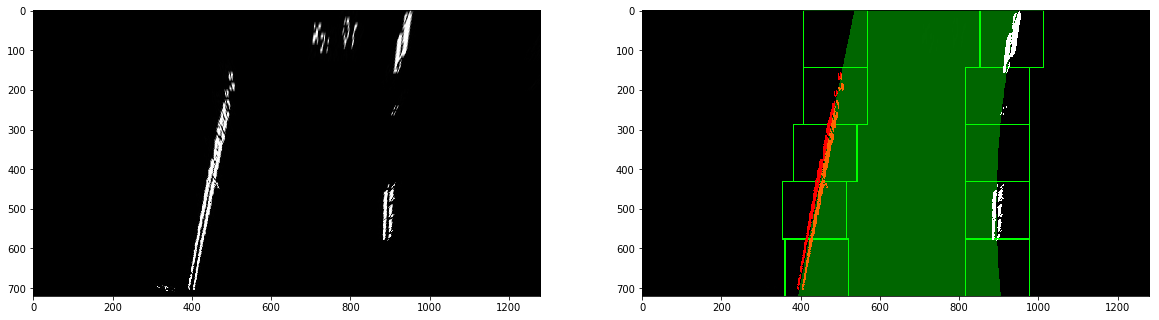

2226.0 1485.0
1899.0 58.0
previous right center: 895
1280.0 2077.0
0.0 0.0
previous right center: 897
previous left center: 457
0.0 329.0
previous right center: 897
previous left center: 457


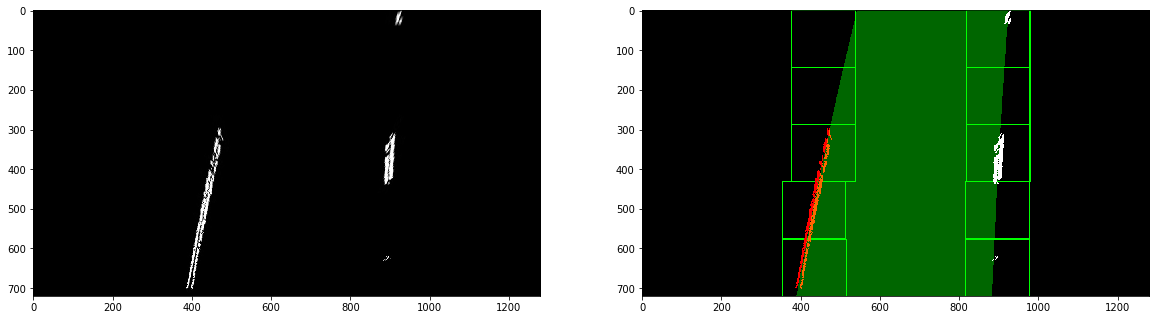

2613.0 2159.0
1876.0 762.0
previous right center: 914
1653.0 1413.0
89.0 0.0
previous right center: 914
previous left center: 448
0.0 0.0
previous right center: 914
previous left center: 448


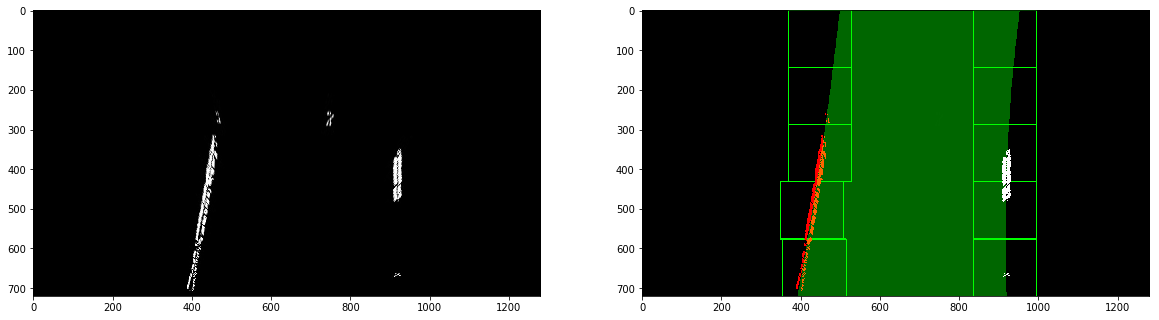

2673.0 571.0
previous right center: 940
1915.0 62.0
previous right center: 940
1948.0 1265.0
408.0 526.0
previous right center: 922
previous left center: 459
0.0 0.0
previous right center: 922
previous left center: 459


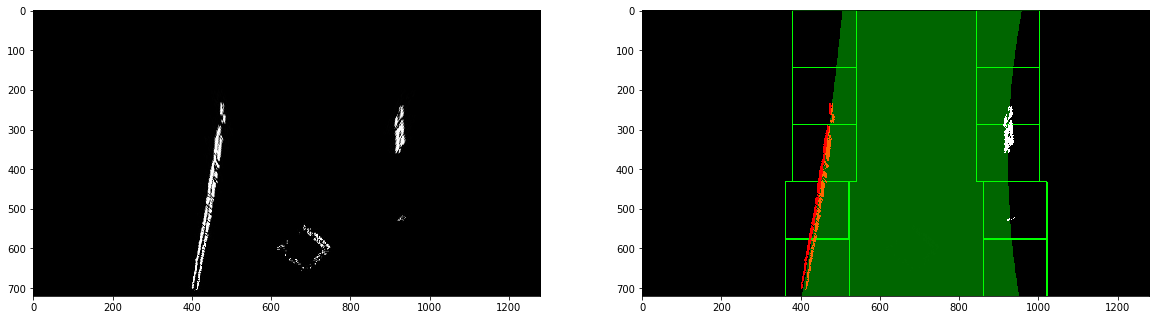

7397.0 492.0
previous right center: 940
3265.0 165.0
previous right center: 940
3728.0 0.0
previous right center: 940
3985.0 2749.0
4060.0 2309.0


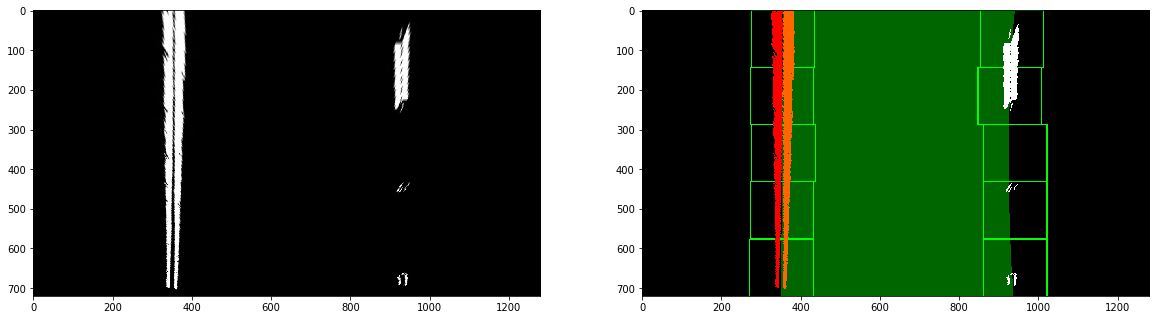

2779.0 6520.0
1221.0 3015.0
32.0 3843.0
previous left center: 352
296.0 4220.0
previous left center: 352
1727.0 4217.0


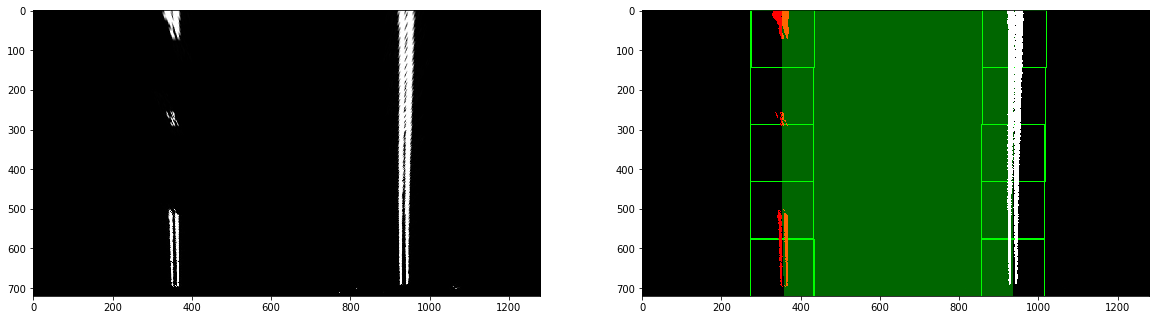

2566.0 724.0
previous right center: 940
1365.0 0.0
previous right center: 940
1468.0 174.0
previous right center: 940
2779.0 186.0
previous right center: 940
1924.0 2235.0


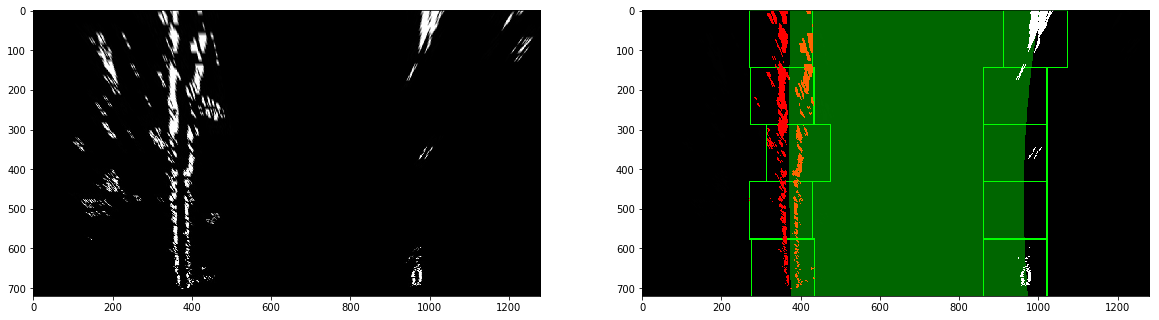

5967.0 80.0
previous right center: 940
2776.0 80.0
previous right center: 940
3165.0 383.0
previous right center: 940
3317.0 4052.0
3091.0 525.0
previous right center: 969


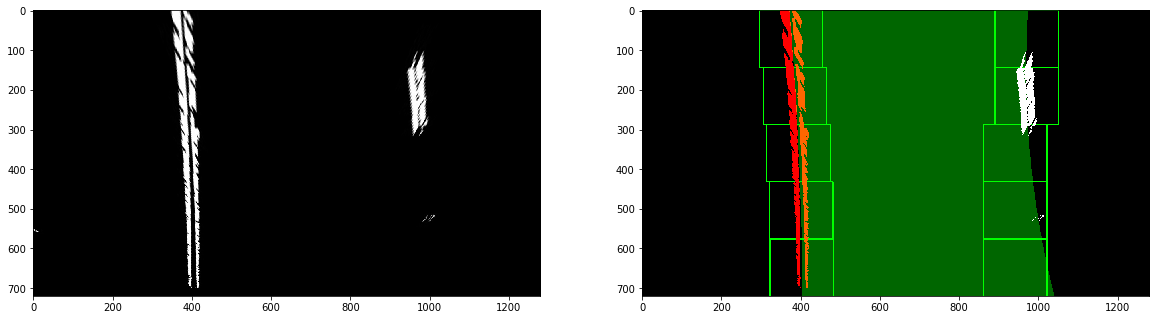

5973.0 2893.0
2954.0 1507.0
3495.0 35.0
previous right center: 963
3888.0 191.0
previous right center: 963
4130.0 1995.0


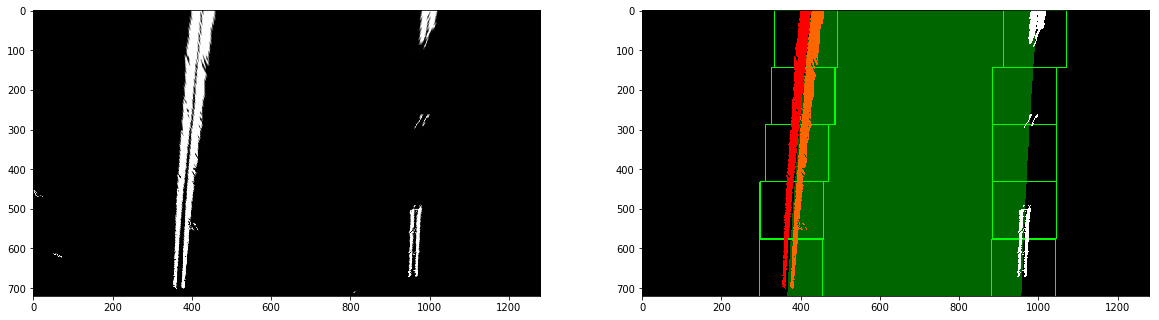

4577.0 1150.0
2820.0 0.0
previous right center: 989
1543.0 3094.0
2156.0 2297.0
2149.0 0.0
previous right center: 990


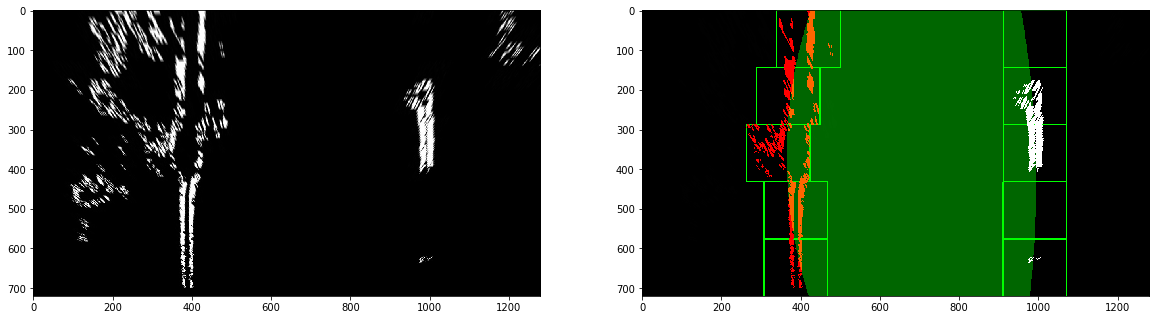

2937.0 3613.0
1332.0 2967.0
1721.0 112.0
previous right center: 961
1992.0 248.0
previous right center: 961
2388.0 676.0
previous right center: 961


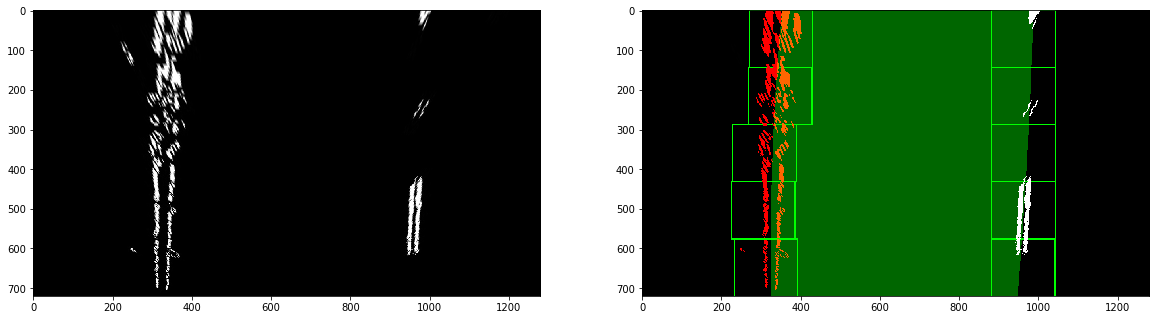

5784.0 69.0
previous right center: 940
2865.0 69.0
previous right center: 940
3380.0 1424.0
3864.0 3186.0
4004.0 0.0
previous right center: 1009


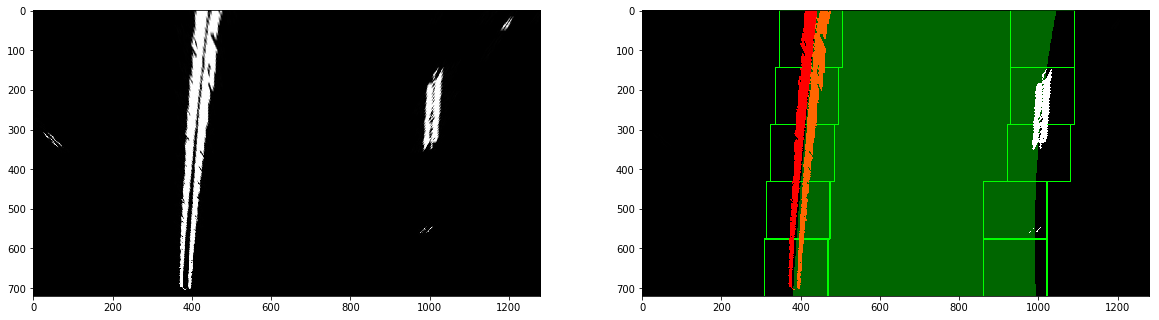

In [51]:
input_dir = "test_images_undist"
warped_input_dir = "test_images_warp"
images = os.listdir(warped_input_dir)
window_width = 30
window_height = height//5
margin = 80

for image_name in images:
    img = cv2.imread(os.path.join(warped_input_dir, image_name), cv2.IMREAD_GRAYSCALE)
    img_binary = np.zeros_like(img)
    img_binary[img>=100] = 1
#     plt.imshow(img_binary, cmap="gray")
#     try:
    out_img, left_fitx, right_fitx, ploty = \
            fit_polynomial_conv(img_binary, window_width, window_height, margin)
    left_p = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    right_p = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    points = np.hstack((left_p, right_p))
    mask_img = np.zeros_like(out_img)
    cv2.fillPoly(mask_img, np.array(points, dtype=np.int32), [0,255,0])
#         orig_mask_img = cv2.warpPerspective(mask_img, Minv, (width, height))
#         img_orig = cv2.imread(os.path.join(input_dir, image_name))
#         img_lane_mask = cv2.addWeighted(orig_mask_img, 0.4, img_orig, 1, 0)

    mask_img = cv2.addWeighted(mask_img, 0.4, out_img, 1, 0)
    f, (axes0, axes1) = plt.subplots(1,2, figsize = (20, 10))
    axes0.imshow(img, cmap="gray")
    axes1.imshow(mask_img)
#         axes1.imshow(cv2.cvtColor(img_lane_mask, cv2.COLOR_BGR2RGB))
    plt.show()
#     except Exception as e:
#         print("Lane lines can't be detected in %s. "%image_name, e)

In [ ]:
window_width = 100
def test_find_centroids(image):
    window_centroids = []
    window = np.ones(window_width)
    
    # Get image width and height
    width, height = image.shape[1], image.shape[0]
    # Sum quarter bottom of image to get slice
    h_low = int(image.shape[0]/2)
    w_mid = int(image.shape[1]/2)
    level_sum = np.sum(image[h_low:, :], axis=0)
    level_center = np.convolve(window, level_sum)
#     r_sum = np.sum(image[h_low:,w_mid:], axis=0)
#     r_center = np.argmax(np.convolve(window, r_sum)) - window_width/2 + w_mid
    
    # Add what we found for the first layer
#     window_centroids.append((l_center, r_center))
    return level_sum

input_dir = "test_images_undist"
warped_input_dir = "test_images_warp"

for image_name in images:
    img = cv2.imread(os.path.join(warped_input_dir, image_name))
    img_binary = np.zeros_like(img[:,:,0])
    img_binary[img[:,:,0]==255] = 1
    l_sum = test_find_centroids(img_binary)
    f, (ax0, ax1) = plt.subplots(1,2, figsize = (20,10))
    ax0.imshow(img_binary, cmap = "gray")
    ax1.plot(np.arange(len(l_sum)), l_sum)
    plt.show()